<h2 align="center"> Лабораторна робота №4</h2>
<h3 align='center'>Структури для роботи з великими обсягами даних в Python</h3>
<p align="center">ФБ-23 Ткачук Андрій</p>

<b>Мета:</b> отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit) 

<b>Основні поняття:</b> numpy масиви, кортежі, списки, фрейми, профілювання.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Перша частина

## dataframe

Завантажу dataframe з наданого посилання

In [73]:
def createdf():
    FilePath='household_power_consumption.txt'
    df=pd.read_csv(FilePath,sep=';',header=0)
    df.replace("?",np.nan, inplace=True)
    
    #Змінюю тип даних
    df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]=df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']].astype(float)
    df['Date']=pd.to_datetime(df['Date'])
    #Змінюю Nan та '?'
    df=df.interpolate()


    return df

df=createdf()
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [3]:
FilePath='household_power_consumption.txt'
df=pd.read_csv(FilePath,sep=';',header=0)
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


### 1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.
### 2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [74]:
%time df_ex1=df[df['Global_active_power']>5]
%time df_ex2=df[df['Voltage']>235]
print(f"загальна активна споживана потужність перевищує 5 кВт:\n{df_ex1}")
print(f"вольтаж перевищує 235 В:\n{df_ex2}")


CPU times: total: 15.6 ms
Wall time: 6 ms
CPU times: total: 93.8 ms
Wall time: 100 ms
загальна активна споживана потужність перевищує 5 кВт:
              Date      Time  Global_active_power  Global_reactive_power  \
1       2006-12-16  17:25:00                5.360                  0.436   
2       2006-12-16  17:26:00                5.374                  0.498   
3       2006-12-16  17:27:00                5.388                  0.502   
11      2006-12-16  17:35:00                5.412                  0.470   
12      2006-12-16  17:36:00                5.224                  0.478   
...            ...       ...                  ...                    ...   
2069356 2010-11-22  18:40:00                5.408                  0.150   
2069357 2010-11-22  18:41:00                5.528                  0.144   
2071586 2010-11-24  07:50:00                5.172                  0.050   
2071587 2010-11-24  07:51:00                5.750                  0.000   
2072997 2010-11-25  07:

### 3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [5]:
%time df_ex3=df[(df['Global_intensity'].between(19,20))& (df['Sub_metering_2']>df['Sub_metering_3'])]
print(df_ex3)

CPU times: total: 15.6 ms
Wall time: 12 ms
              Date      Time  Global_active_power  Global_reactive_power  \
45      2006-12-16  18:09:00                4.464                  0.136   
460     2006-12-17  01:04:00                4.582                  0.258   
464     2006-12-17  01:08:00                4.618                  0.104   
475     2006-12-17  01:19:00                4.636                  0.140   
476     2006-12-17  01:20:00                4.634                  0.152   
...            ...       ...                  ...                    ...   
2071589 2010-11-24  07:53:00                4.666                  0.000   
2071590 2010-11-24  07:54:00                4.694                  0.000   
2071591 2010-11-24  07:55:00                4.602                  0.000   
2071592 2010-11-24  07:56:00                4.536                  0.000   
2071593 2010-11-24  07:57:00                4.626                  0.000   

         Voltage  Global_intensity  Sub_mete

### 4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії, а також 


In [71]:
%%time 
df_ex4=df.sample(n=500000)
sm1=df_ex4['Sub_metering_1'].mean()
sm2=df_ex4['Sub_metering_2'].mean()
sm3=df_ex4['Sub_metering_3'].mean()
print(f"Середнє значення Sub_metering_1: {sm1}")
print(f"Середнє значення Sub_metering_2: {sm2}")
print(f"Середнє значення Sub_metering_3: {sm3}")
print('\n\n')
print(df_ex4)



Середнє значення Sub_metering_1: 1.1060243637912677
Середнє значення Sub_metering_2: 1.2854375693569697
Середнє значення Sub_metering_3: 6.440547655136653



               Date      Time  Global_active_power  Global_reactive_power  \
919794    15/9/2008  11:18:00             0.468000               0.094000   
192037    29/4/2007  02:01:00             0.384411               0.154206   
1619062   14/1/2010  01:46:00             1.788450               0.112000   
1207917    3/4/2009  13:21:00             1.572000               0.000000   
1249058    2/5/2009  03:02:00             0.434000               0.284000   
...             ...       ...                  ...                    ...   
502343   30/11/2007  13:47:00             5.490000               0.000000   
1340667    4/7/2009  17:51:00             3.502000               0.368000   
428648   10/10/2007  09:32:00             0.312000               0.084000   
85404     14/2/2007  00:48:00             0.388000               0.25400

### 5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [7]:
%%time 
df_ex5=df_ex4[(df_ex4['Time']>'18:00:00') & (df_ex4['Global_active_power']>6) & (df_ex4['Sub_metering_2'].gt(df_ex4['Sub_metering_1'],df_ex4['Sub_metering_3']))]
fh=df_ex5.iloc[:len(df_ex5) // 2]
sh=df_ex5.iloc[len(df_ex5) // 2:]
res=pd.concat([fh.iloc[2::3],sh.iloc[3::4]])
print('df_ex5.head(10)')
print(df_ex5.head(10))
print('\n\n')
print('res.head(10)')
print(res.head(10))
print('\n\n')
print('df_ex5.tail(10)')
print(df_ex5.tail(10))
print('\n\n')
print('res.tail(10)')
print(res.tail(10))

df_ex5.head(10)
              Date      Time  Global_active_power  Global_reactive_power  \
112458  2007-03-04  19:42:00                6.378                  0.150   
51963   2007-01-21  19:27:00                7.552                  0.250   
34767   2007-01-09  20:51:00                7.996                  0.100   
542928  2007-12-28  18:12:00                6.400                  0.332   
777857  2008-06-08  21:41:00                6.878                  0.158   
1228523 2009-04-17  20:47:00                7.198                  0.314   
1575440 2009-12-14  18:44:00                6.642                  0.540   
476835  2007-11-12  20:39:00                7.702                  0.276   
641089  2008-03-05  22:13:00                6.204                  0.232   
2066476 2010-11-20  18:40:00                6.416                  0.350   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
112458    233.20              27.2             0.0            71.0   
51963  

## numpy array

Створюю numpy array з dataframe

In [36]:
def createdf():
    FilePath='household_power_consumption.txt'
    df=pd.read_csv(FilePath,sep=';',header=0)
    df.replace("?",np.nan, inplace=True)
    
    #Змінюю тип даних
    df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]=df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']].astype(float)
    #Змінюю Nan та '?'
    df=df.interpolate()


    return df

df=createdf()
datanp=df.to_numpy()
print(datanp[:5])
print(datanp.shape)

[['16/12/2006' '17:24:00' 4.216 0.418 234.84 18.4 0.0 1.0 17.0]
 ['16/12/2006' '17:25:00' 5.36 0.436 233.63 23.0 0.0 1.0 16.0]
 ['16/12/2006' '17:26:00' 5.374 0.498 233.29 23.0 0.0 2.0 17.0]
 ['16/12/2006' '17:27:00' 5.388 0.502 233.74 23.0 0.0 1.0 17.0]
 ['16/12/2006' '17:28:00' 3.666 0.528 235.68 15.8 0.0 1.0 17.0]]
(2075259, 9)


### 1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [9]:
%%time
n_ex1=datanp[datanp[:,2]>5]
print(n_ex1)

[['16/12/2006' '17:25:00' 5.36 ... 0.0 1.0 16.0]
 ['16/12/2006' '17:26:00' 5.374 ... 0.0 2.0 17.0]
 ['16/12/2006' '17:27:00' 5.388 ... 0.0 1.0 17.0]
 ...
 ['24/11/2010' '07:50:00' 5.172 ... 0.0 38.0 17.0]
 ['24/11/2010' '07:51:00' 5.75 ... 0.0 39.0 17.0]
 ['25/11/2010' '07:21:00' 5.074 ... 1.0 2.0 18.0]]
CPU times: total: 62.5 ms
Wall time: 62 ms


### 2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [10]:
%%time
n_ex2=datanp[datanp[:,4]>235]
print(n_ex2[:5])

[['16/12/2006' '17:28:00' 3.666 0.528 235.68 15.8 0.0 1.0 17.0]
 ['16/12/2006' '17:29:00' 3.52 0.522 235.02 15.0 0.0 2.0 17.0]
 ['16/12/2006' '17:30:00' 3.702 0.52 235.09 15.8 0.0 1.0 17.0]
 ['16/12/2006' '17:31:00' 3.7 0.52 235.22 15.8 0.0 1.0 17.0]
 ['16/12/2006' '17:38:00' 4.054 0.422 235.24 17.6 0.0 1.0 17.0]]
CPU times: total: 156 ms
Wall time: 160 ms


### 3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [11]:
%%time
n_ex3=datanp[(datanp[:,5]>19)&(datanp[:,5]<20)&(datanp[:,7]>datanp[:,6])]
print(n_ex3[:20])

[['16/12/2006' '17:34:00' 4.448 0.498 232.86 19.6 0.0 1.0 17.0]
 ['16/12/2006' '18:16:00' 4.524 0.076 234.2 19.6 0.0 9.0 17.0]
 ['16/12/2006' '18:18:00' 4.472 0.0 233.29 19.2 0.0 1.0 16.0]
 ['16/12/2006' '18:36:00' 4.536 0.0 233.54 19.4 0.0 1.0 17.0]
 ['17/12/2006' '01:04:00' 4.582 0.258 238.08 19.6 0.0 13.0 0.0]
 ['17/12/2006' '01:08:00' 4.618 0.104 239.61 19.6 0.0 27.0 0.0]
 ['17/12/2006' '01:19:00' 4.636 0.14 237.37 19.4 0.0 36.0 0.0]
 ['17/12/2006' '01:20:00' 4.634 0.152 237.17 19.4 0.0 35.0 0.0]
 ['17/12/2006' '01:21:00' 4.652 0.142 237.92 19.4 0.0 36.0 0.0]
 ['17/12/2006' '01:52:00' 4.622 0.24 239.59 19.2 0.0 37.0 0.0]
 ['17/12/2006' '10:55:00' 4.444 0.136 235.97 19.2 2.0 50.0 17.0]
 ['17/12/2006' '20:21:00' 4.464 0.388 233.9 19.4 0.0 1.0 17.0]
 ['17/12/2006' '20:22:00' 4.448 0.396 233.44 19.4 0.0 1.0 17.0]
 ['18/12/2006' '19:23:00' 4.642 0.4 233.62 19.8 0.0 36.0 0.0]
 ['18/12/2006' '19:24:00' 4.58 0.39 232.51 19.6 0.0 37.0 0.0]
 ['18/12/2006' '20:17:00' 4.516 0.0 232.91 19.4 0.0

### 4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії,

In [12]:
%%time
id_list=np.random.choice(datanp.shape[0],500000,replace=False)
# print(len(n_ex4))
# print(len(set(n_ex4)))
n_ex4=datanp[id_list]
n_sm1=np.mean(datanp[:,6])
n_sm2=np.mean(datanp[:,7])
n_sm3=np.mean(datanp[:,8])
print(n_ex4)
print(f"Середнє значення Sub_metering_1: {n_sm1}")
print(f"Середнє значення Sub_metering_2: {n_sm2}")
print(f"Середнє значення Sub_metering_3: {n_sm3}")


[['17/9/2009' '23:50:00' 0.21 ... 0.0 0.0 1.0]
 ['22/6/2010' '19:42:00' 0.428 ... 0.0 1.0 0.0]
 ['17/11/2007' '03:52:00' 0.304 ... 0.0 2.0 0.0]
 ...
 ['8/4/2007' '19:48:00' 0.224 ... 0.0 0.0 0.0]
 ['28/5/2008' '07:13:00' 1.61 ... 0.0 2.0 18.0]
 ['14/3/2008' '15:12:00' 2.492 ... 1.0 2.0 19.0]]
Середнє значення Sub_metering_1: 1.1094848883922441
Середнє значення Sub_metering_2: 1.2892291998251784
Середнє значення Sub_metering_3: 6.442385504652672
CPU times: total: 344 ms
Wall time: 373 ms


### 5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [13]:
%%time
n_ex5=n_ex4[(n_ex4[:,1]>'18:00:00')&(n_ex4[:,2]>6)&(n_ex4[:,7]>n_ex4[:,6])&(n_ex4[:,7]>n_ex4[:,8])]
half_index = len(n_ex5) // 2
first_half = n_ex5[:half_index]
second_half = n_ex5[half_index:]

selected_elements = np.concatenate([first_half[2::3], second_half[3::4]])
print(n_ex5[:10])
print('\n')
print(selected_elements[:5])
print('\n')
print(n_ex5[-10:])
print('\n')
print(selected_elements[-4:])

[['20/2/2007' '20:35:00' 6.932 0.194 230.81 30.0 0.0 71.0 17.0]
 ['23/11/2008' '18:34:00' 6.168 0.308 231.57 26.6 0.0 22.0 17.0]
 ['12/11/2007' '20:37:00' 7.716 0.376 232.26 33.2 0.0 72.0 17.0]
 ['3/7/2008' '21:52:00' 6.292 0.216 234.31 27.0 30.0 36.0 18.0]
 ['3/4/2007' '19:25:00' 7.794 0.3 228.96 34.0 36.0 37.0 16.0]
 ['17/3/2009' '20:29:00' 6.286 0.106 238.09 26.4 0.0 57.0 18.0]
 ['9/12/2007' '19:14:00' 6.284 0.292 230.12 27.2 0.0 34.0 16.0]
 ['22/2/2007' '21:13:00' 9.26 0.0 224.76 41.2 35.0 66.0 16.0]
 ['4/12/2007' '21:27:00' 6.524 0.376 235.58 27.8 0.0 36.0 17.0]
 ['5/3/2008' '18:30:00' 6.276 0.172 234.28 26.8 0.0 68.0 0.0]]


[['12/11/2007' '20:37:00' 7.716 0.376 232.26 33.2 0.0 72.0 17.0]
 ['17/3/2009' '20:29:00' 6.286 0.106 238.09 26.4 0.0 57.0 18.0]
 ['4/12/2007' '21:27:00' 6.524 0.376 235.58 27.8 0.0 36.0 17.0]
 ['22/9/2008' '20:20:00' 6.684 0.128 233.23 28.6 2.0 71.0 17.0]
 ['23/2/2010' '21:59:00' 6.524 0.092 233.69 27.8 0.0 73.0 17.0]]


[['17/4/2009' '20:52:00' 6.914 0.092 

## Таблиця


<table>
    <tr>
        <td rowspan=2>Номер завдання:</td>
        <td>DataFrame</td>
        <td>Numpy array</td>
    </tr>
    <tr>
        <td colspan=2>Швидкість,ms</td>
    </tr>
    <tr>
        <td>1</td>
        <td>5</td>
        <td>58</td>
    </tr>
        <tr>
        <td>2</td>
        <td>112</td>
        <td>241</td>
    </tr>
        <tr>
        <td>3</td>
        <td>12</td>
        <td>122</td>
    </tr>
        <tr>
        <td>4</td>
        <td>226</td>
        <td>540</td>
    </tr>
        <tr>
        <td>5</td>
        <td>58</td>
        <td>237</td>
    </tr>

</table>

# Друга частина

## dataframe

In [14]:
%%time
df2=pd.read_excel("Vehicle.xlsx")
df2.drop(columns=['Vehicle_Years'], inplace=True)

print(df2.head(10))
print(df2.dtypes)


                      Vehicle_Model  Start_Year  End_Year Vehicle_Brand  \
0  REXTON RX270 SE CRD (163) ESTATE        2004    2007.0     SSANGYONG   
1  REXTON RX270 SX CRD (163) ESTATE        2004    2007.0     SSANGYONG   
2  REXTON RX270 SX CRD (163) ESTATE        2004    2007.0     SSANGYONG   
3   REXTON RX270 S CRD (163) ESTATE        2004    2007.0     SSANGYONG   
4   REXTON RX270 S CRD (163) ESTATE        2004    2007.0     SSANGYONG   
5           RODIUS 270 S CDI ESTATE        2005    2008.0     SSANGYONG   
6           RODIUS 270 S CDI ESTATE        2005    2008.0     SSANGYONG   
7          RODIUS 270 SE CDI ESTATE        2005    2008.0     SSANGYONG   
8          RODIUS 270 SX CDI ESTATE        2005    2008.0     SSANGYONG   
9          RODIUS 270 SX CDI ESTATE        2005    2008.0     SSANGYONG   

   Vehicle_Doors  Vehicle_Engine_CC Vehicle_Fuel  Vehicle_Length  \
0              5               2696       Diesel          4720.0   
1              5               2696   

### 1. Поборотися із зниклими даними.


In [15]:
print(f"Кількість зниклих даних: \n{df2.isnull().sum()}")

Кількість зниклих даних: 
Vehicle_Model                       0
Start_Year                          0
End_Year                         2967
Vehicle_Brand                       0
Vehicle_Doors                       0
Vehicle_Engine_CC                   0
Vehicle_Fuel                        0
Vehicle_Length                   2028
Vehicle_Maximum_Speed               0
Vehicle_MPG                      2028
Vehicle_Power                       0
Vehicle_Power_to_Weight_Ratio    2028
Vehicle_Transmission                0
Price                            3981
dtype: int64


#### 1.1 Зниклі дані в колонці End_Year

In [16]:
%%time
meangap=(df2['End_Year']-df2['Start_Year']).mean()
print(meangap)
print(df2[df2['Start_Year']==2008].head(2))
df2['End_Year']=df2['End_Year'].fillna(df2['Start_Year']+meangap).astype(int)
print(df2[df2['Start_Year']==2008].head(2))

2.324447296272531
           Vehicle_Model  Start_Year  End_Year Vehicle_Brand  Vehicle_Doors  \
17   RODIUS S CDI ESTATE        2008       NaN     SSANGYONG              5   
18  RODIUS ES CDI ESTATE        2008       NaN     SSANGYONG              5   

    Vehicle_Engine_CC Vehicle_Fuel  Vehicle_Length  Vehicle_Maximum_Speed  \
17               2696       Diesel          5125.0                    106   
18               2696       Diesel          5125.0                    105   

    Vehicle_MPG  Vehicle_Power  Vehicle_Power_to_Weight_Ratio  \
17         32.1          162.3                           74.4   
18         32.1          162.3                           74.4   

   Vehicle_Transmission    Price  
17               Manual      NaN  
18               Manual  280.895  
           Vehicle_Model  Start_Year  End_Year Vehicle_Brand  Vehicle_Doors  \
17   RODIUS S CDI ESTATE        2008      2010     SSANGYONG              5   
18  RODIUS ES CDI ESTATE        2008      2010     SS

#### 1.2 Зниклі дані в колонці Vehicle_Length, Vehicle_MPG, Vehicle_Power_to_Weight_Ratio

In [17]:
%%time
print('До зміни\n')
print(df2[df2['Vehicle_Length'].isnull()][['Vehicle_Model','Vehicle_Length','Vehicle_MPG','Vehicle_Power_to_Weight_Ratio']].head())
index=[8,12,30,37,39]
df2['Vehicle_Length']=df2['Vehicle_Length'].bfill()
df2['Vehicle_MPG']=df2['Vehicle_MPG'].bfill()
df2['Vehicle_Power_to_Weight_Ratio']=df2['Vehicle_Power_to_Weight_Ratio'].bfill()
print('\nПісля зміни\n')
print(df2.loc[index][['Vehicle_Model','Vehicle_Length','Vehicle_MPG','Vehicle_Power_to_Weight_Ratio']].head())

До зміни

               Vehicle_Model  Vehicle_Length  Vehicle_MPG  \
8   RODIUS 270 SX CDI ESTATE             NaN          NaN   
12        KYRON S CDI ESTATE             NaN          NaN   
30     KORANDO ES D20T (2WD)             NaN          NaN   
37     KORANDO SE D20T (2WD)             NaN          NaN   
39          KENARI EZ ESTATE             NaN          NaN   

    Vehicle_Power_to_Weight_Ratio  
8                             NaN  
12                            NaN  
30                            NaN  
37                            NaN  
39                            NaN  

Після зміни

               Vehicle_Model  Vehicle_Length  Vehicle_MPG  \
8   RODIUS 270 SX CDI ESTATE          5125.0         28.5   
12        KYRON S CDI ESTATE          4660.0         36.7   
30     KORANDO ES D20T (2WD)          4410.0         47.1   
37     KORANDO SE D20T (2WD)          3460.0         50.4   
39          KENARI EZ ESTATE          2500.0         55.4   

    Vehicle_Power_to_Weigh

### 1.3 Зниклі дані в колонці Price

In [18]:
%%time
print('До зміни\n')
print(df2[df2['Price'].isnull()][['Vehicle_Model','Price']].head())
index=[3,10,17,22,28]
df2['Price']=df2['Price'].interpolate()
print('\nПісля зміни\n')
print(df2.loc[index][['Vehicle_Model','Price']].head())

До зміни

                      Vehicle_Model  Price
3   REXTON RX270 S CRD (163) ESTATE    NaN
10         KYRON S (2WD) CDI ESTATE    NaN
17              RODIUS S CDI ESTATE    NaN
22    REXTON 270 SPR 186 CRD ESTATE    NaN
28             KYRON SPR CDI ESTATE    NaN

Після зміни

                      Vehicle_Model       Price
3   REXTON RX270 S CRD (163) ESTATE  283.325000
10         KYRON S (2WD) CDI ESTATE  381.153000
17              RODIUS S CDI ESTATE  289.225500
22    REXTON 270 SPR 186 CRD ESTATE  309.236667
28             KYRON SPR CDI ESTATE  174.055000
CPU times: total: 31.2 ms
Wall time: 7 ms


### 2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

#### 2.1 Нормалізація?


In [19]:
%%time
print(df2.dtypes)
df2['Vehicle_Maximum_Speed']=df2['Vehicle_Maximum_Speed'].astype(float)
df2['Vehicle_Doors']=df2['Vehicle_Doors'].astype(float)
df2['Vehicle_Engine_CC']=df2['Vehicle_Engine_CC'].astype(float)
print(df2.dtypes)

Vehicle_Model                     object
Start_Year                         int64
End_Year                           int32
Vehicle_Brand                     object
Vehicle_Doors                      int64
Vehicle_Engine_CC                  int64
Vehicle_Fuel                      object
Vehicle_Length                   float64
Vehicle_Maximum_Speed              int64
Vehicle_MPG                      float64
Vehicle_Power                    float64
Vehicle_Power_to_Weight_Ratio    float64
Vehicle_Transmission              object
Price                            float64
dtype: object
Vehicle_Model                     object
Start_Year                         int64
End_Year                           int32
Vehicle_Brand                     object
Vehicle_Doors                    float64
Vehicle_Engine_CC                float64
Vehicle_Fuel                      object
Vehicle_Length                   float64
Vehicle_Maximum_Speed            float64
Vehicle_MPG                      float64
Ve

                      Vehicle_Model  Start_Year  End_Year Vehicle_Brand  \
0  REXTON RX270 SE CRD (163) ESTATE        2004      2007     SSANGYONG   
1  REXTON RX270 SX CRD (163) ESTATE        2004      2007     SSANGYONG   
2  REXTON RX270 SX CRD (163) ESTATE        2004      2007     SSANGYONG   
3   REXTON RX270 S CRD (163) ESTATE        2004      2007     SSANGYONG   
4   REXTON RX270 S CRD (163) ESTATE        2004      2007     SSANGYONG   

   Vehicle_Doors  Vehicle_Engine_CC Vehicle_Fuel  Vehicle_Length  \
0            5.0             2696.0       Diesel          4720.0   
1            5.0             2696.0       Diesel          4720.0   
2            5.0             2696.0       Diesel          4720.0   
3            5.0             2696.0       Diesel          4720.0   
4            5.0             2696.0       Diesel          4720.0   

   Vehicle_Maximum_Speed  Vehicle_MPG  Vehicle_Power  \
0                  111.0         30.1          162.3   
1                  111.0    

CPU times: total: 3.34 s
Wall time: 1.1 s


<Axes: xlabel='Vehicle_Length', ylabel='Density'>

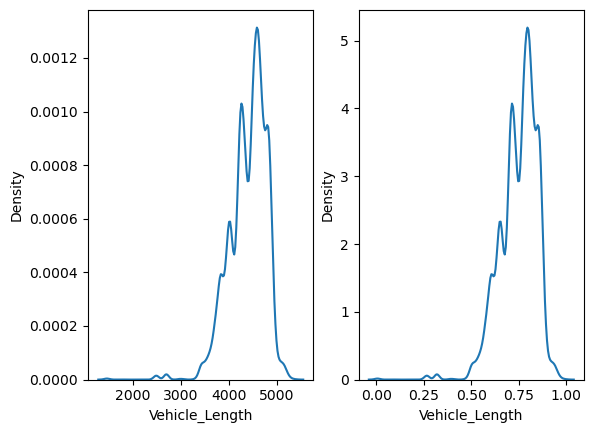

In [20]:
%%time
def normalize_df(df):
    norm_df=df.copy(deep=True)
    for col in norm_df.columns:
        if norm_df[col].dtype =='float64':
            min_val = norm_df[col].min()
            max_val = norm_df[col].max()

            norm_df[col]=(norm_df[col] - min_val) / (max_val - min_val)
    return norm_df

n_df=normalize_df(df2)
print(df2.head())
print(n_df.head())
fig, axs=plt.subplots(ncols=2)
sns.kdeplot(x=df2['Vehicle_Length'], ax=axs[0])
sns.kdeplot(x=n_df['Vehicle_Length'],ax=axs[1])

#### 2.2 Стандартизація

CPU times: total: 1.8 s
Wall time: 324 ms


<Axes: xlabel='Vehicle_Length', ylabel='Density'>

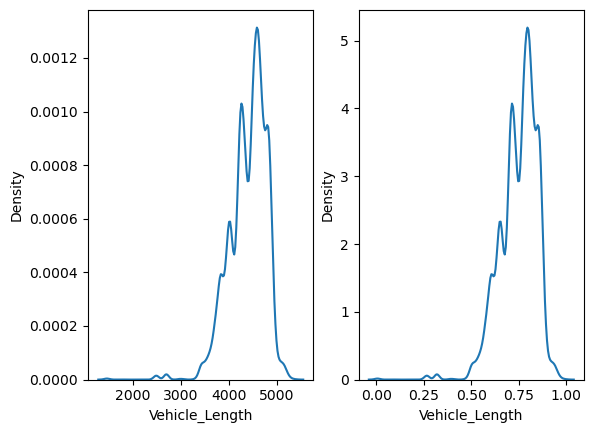

In [21]:
%%time
def standartize_df(df):
    st_df=df.copy(deep=True)
    for col in st_df.columns:
        if st_df[col].dtype =='float64':
            mean_val = st_df[col].mean()
            std_val = st_df[col].std()
            st_df[col]=(st_df[col] - mean_val) / std_val
    return st_df

st_df=standartize_df(df2)
fig, axs=plt.subplots(ncols=2)
sns.kdeplot(x=df2['Vehicle_Length'], ax=axs[0])
sns.kdeplot(x=n_df['Vehicle_Length'],ax=axs[1])

### 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

CPU times: total: 1.8 s
Wall time: 343 ms


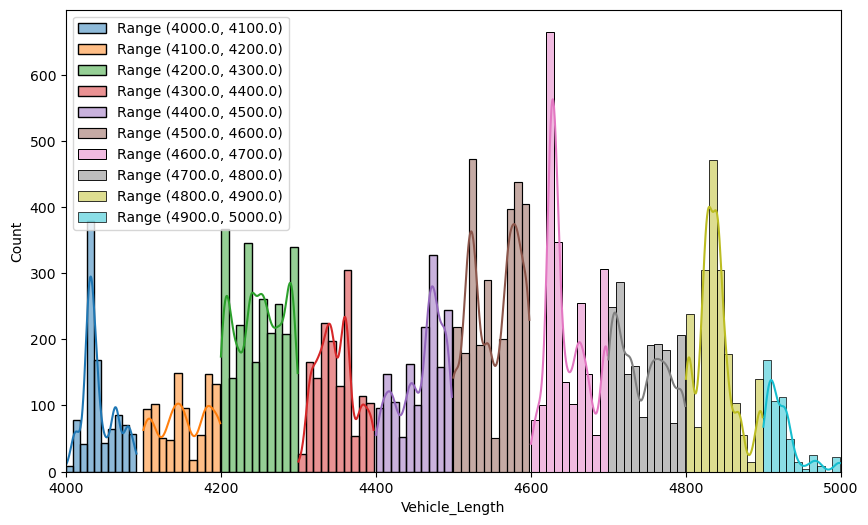

In [76]:
%%time
def histogram(df,col,minvalue,maxvalue,rangescount):
    step=(maxvalue-minvalue) / rangescount
    ranges_list=[]
    i=0
    for i in range(rangescount):
        start=round((minvalue + i*step),3)
        end=round((minvalue + (i+1)*step),3)
        ranges_list.append((start,end))
    hist_data = [[] for _ in range(len(ranges_list))]
    
    for value in df[col]:
        for i, (start, end) in enumerate(ranges_list):
            if start <= value < end:
                hist_data[i].append(value)
                break
    
    plt.figure(figsize=(10, 6))
    for i, data in enumerate(hist_data):
        sns.histplot(data, bins=rangescount, kde=True, label=f'Range {ranges_list[i]}')
    plt.legend()
    plt.xlim(minvalue, maxvalue)
    plt.xlabel(col)

histogram(df2,'Vehicle_Length',4000,5000,10)

### 4. Збудувати графік залежності одного integer/real атрибута від іншого.

CPU times: total: 953 ms
Wall time: 168 ms


<Axes: xlabel='Vehicle_Power', ylabel='Vehicle_Maximum_Speed'>

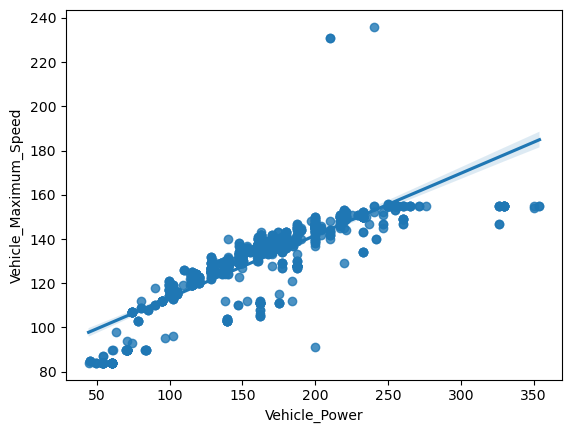

In [51]:
%%time
sns.regplot(x='Vehicle_Power',y='Vehicle_Maximum_Speed', data=df2.head(1000))

### 5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.

In [54]:
%%time
pearson=scipy.stats.pearsonr(df2['Vehicle_Maximum_Speed'],df2['Vehicle_Power'])[0]
print(f"{pearson=}")
spearmanr=scipy.stats.spearmanr(df2['Vehicle_Maximum_Speed'],df2['Vehicle_Power'])[0]
print(f"{spearmanr=}")
spearmanr2=scipy.stats.spearmanr(df2['Vehicle_Doors'],df2['Vehicle_Power'])[0]
print(f"{spearmanr2=}")

pearson=0.8358810966525736
spearmanr=0.8687141149144388
spearmanr2=-0.10075384968399748
CPU times: total: 0 ns
Wall time: 8 ms


### 6. Провести One Hot Encoding категоріального string атрибуту.

In [59]:
%%time
ohe_df=df2.copy(deep=True)
rd=ohe_df['Vehicle_Fuel'].values.reshape(-1,1)
enc=OneHotEncoder()
enc_data=enc.fit_transform(rd)
# print(enc_data)
enc_df=pd.DataFrame(enc_data.toarray())
# print(enc_df)
enc_df.columns=['Diesel','Petrol']

for i, col in enumerate(enc_df):
    ohe_df.insert(i,col,enc_df[col],True)

ohe_df.sample(10)



CPU times: total: 0 ns
Wall time: 9 ms


,Diesel,Petrol,Vehicle_Model,Start_Year,End_Year,Vehicle_Brand,Vehicle_Doors,Vehicle_Engine_CC,Vehicle_Fuel,Vehicle_Length,Vehicle_Maximum_Speed,Vehicle_MPG,Vehicle_Power,Vehicle_Power_to_Weight_Ratio,Vehicle_Transmission,Price
722,0.0,1.0,A4 T SPORT CABRIOLET,2004,2010,AUDI,2.0,1781.0,Petrol,4573.0,136.0,33.2,163.1,153.1,Automatic,350.005593
16302,1.0,0.0,ASTRA ENJOY CDTI,2004,2004,VAUXHALL,5.0,1686.0,Diesel,4110.0,108.0,47.1,93.9,65.0,Manual,301.909540
12615,0.0,1.0,MEGANE DYNAMIQUE (110) ESTATE,2009,2010,RENAULT,5.0,1598.0,Petrol,4295.0,121.0,40.9,110.0,90.5,Manual,232.589286
20079,1.0,0.0,V70 SE LUX D4 (181) ESTATE,2013,2015,VOLVO,5.0,1969.0,Diesel,4814.0,137.0,62.8,178.0,101.4,Automatic,293.470389
9865,1.0,0.0,PRIMERA SVE DCI,2003,2007,NISSAN,5.0,2184.0,Diesel,4675.0,126.0,46.3,136.8,94.0,Manual,376.857805
12704,0.0,1.0,CLIO DYNAMIQUE TOM TOM TURBO (100) ESTATE,2009,2012,RENAULT,5.0,1149.0,Petrol,4233.0,114.0,52.3,100.0,89.3,Manual,227.432673
2998,1.0,0.0,318 D EDITION SE ESTATE,2008,2008,BMW,5.0,1995.0,Diesel,4520.0,130.0,58.9,141.0,93.7,Manual,325.517857
6945,0.0,1.0,XJ6 SOVEREIGN V6,2004,2009,JAGUAR,4.0,2967.0,Petrol,5090.0,145.0,26.9,240.0,144.7,Automatic,368.946809
18314,1.0,0.0,GOLF_PLUS GT TDI (140),2005,2009,VOLKSWAGEN,5.0,1968.0,Diesel,4206.0,124.0,44.8,140.0,108.3,Automatic,281.315926
9441,1.0,0.0,SHOGUN SPORT CLASSIC TD ESTATE,2000,2009,MITSUBISHI,5.0,2477.0,Diesel,4546.0,93.0,27.2,114.0,59.5,Manual,335.560588


### 7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі -https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

CPU times: total: 5.33 s
Wall time: 3.85 s


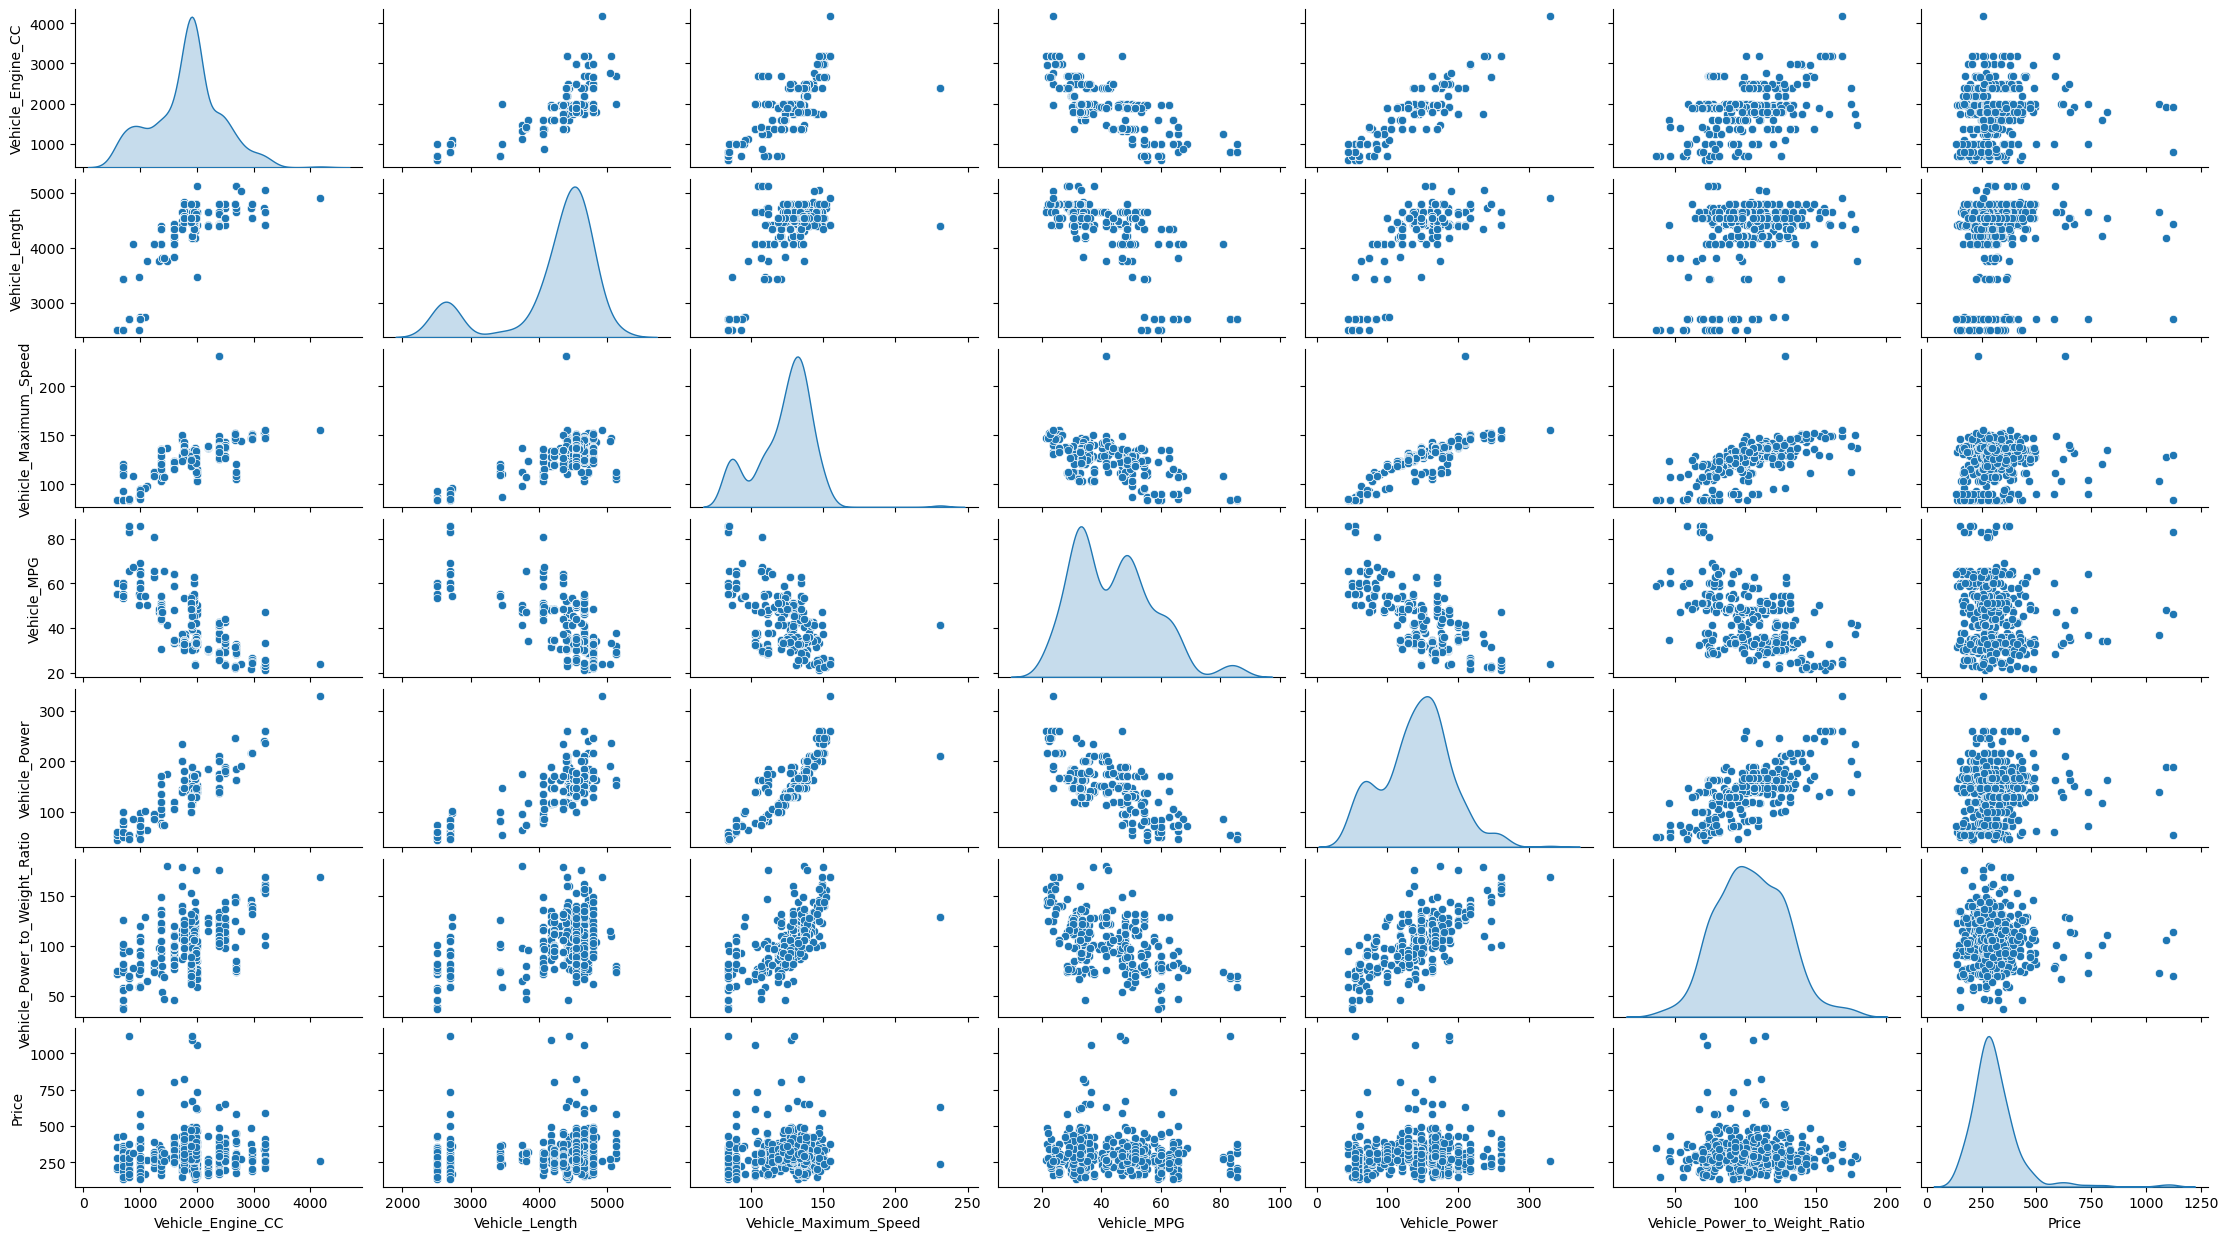

In [67]:
%%time
cols = ['Vehicle_Engine_CC', 'Vehicle_Length', 'Vehicle_Maximum_Speed', 'Vehicle_MPG', 'Vehicle_Power', 'Vehicle_Power_to_Weight_Ratio', 'Price']
pp = sns.pairplot(df2[cols].head(500), height=1.8, aspect=1.8,diag_kind="kde")


## numpy array


Створення numpy array

In [27]:
%%time
tmp=pd.read_excel("Vehicle.xlsx")
tmp.drop(columns=['Vehicle_Years'], inplace=True)


data2np=tmp.to_numpy()
for i in[4,5,7,8,9,10,11,13]:
    data2np[:,i]=data2np[:,i].astype(np.float64)

print(data2np[:10])

[['REXTON RX270 SE CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 81.2 'Automatic' 300.27]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 75.0 'Manual' 384.105]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 28.5 162.3 146.3 'Automatic' 280.9366666666667]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 32.8 162.3 75.0 'Manual' nan]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 75.0 'Automatic' 285.7133333333333]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  5125.0 111.0 28.5 162.3 73.5 'Automatic' 445.605]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  5125.0 105.0 32.1 162.3 74.4 'Manual' 394.76666666666665]
 ['RODIUS 270 SE CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel

### 1. Поборотися із зниклими даними

In [28]:
%%time
print("До зміни:")
print(data2np[:, 2][:20])
data2np[pd.isnull(data2np)] = 0
print("\nПісля зміни:")
print(data2np[:, 2][:20])

До зміни:
[2007.0 2007.0 2007.0 2007.0 2007.0 2008.0 2008.0 2008.0 2008.0 2008.0
 2008.0 2008.0 2008.0 2008.0 2008.0 2008.0 2008.0 nan nan nan]

Після зміни:
[2007.0 2007.0 2007.0 2007.0 2007.0 2008.0 2008.0 2008.0 2008.0 2008.0
 2008.0 2008.0 2008.0 2008.0 2008.0 2008.0 2008.0 0 0 0]
CPU times: total: 15.6 ms
Wall time: 10 ms


### 2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі 4 функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

#### 2.1 Нормалізація?


In [29]:
%%time
def normalize_array(arr):
    d_norm=arr.copy()
    for i in[4,5,7,8,9,10,11,13]:
        min_val=np.min(d_norm[:,i])
        max_val=np.max(d_norm[:,i])
        d_norm[:,i]=(d_norm[:,i] - min_val) /(max_val - min_val)
        
    return d_norm

arr_norm=normalize_array(data2np)
print(data2np[:10])
print('\n')
print(arr_norm[:10])

[['REXTON RX270 SE CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 81.2 'Automatic' 300.27]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 75.0 'Manual' 384.105]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 28.5 162.3 146.3 'Automatic' 280.9366666666667]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 32.8 162.3 75.0 'Manual' 0]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 75.0 'Automatic' 285.7133333333333]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  5125.0 111.0 28.5 162.3 73.5 'Automatic' 445.605]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  5125.0 105.0 32.1 162.3 74.4 'Manual' 394.76666666666665]
 ['RODIUS 270 SE CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'


#### 2.2 Стандартизація

In [30]:
%%time
def standart_array(arr):
    st_arr=arr.copy()
    for i in[4,5,7,8,9,10,11,13]:
        mean_val=np.mean(st_arr[:,i])
        std_val=np.std(st_arr[:,i])
        st_arr[:,i]=(st_arr[:,i] - mean_val) / std_val
        
    return st_arr

arr_st=normalize_array(data2np)
print(data2np[:10])
print('\n')
print(arr_st[:10])

[['REXTON RX270 SE CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 81.2 'Automatic' 300.27]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 75.0 'Manual' 384.105]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 28.5 162.3 146.3 'Automatic' 280.9366666666667]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 32.8 162.3 75.0 'Manual' 0]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 4720.0 111.0 30.1 162.3 75.0 'Automatic' 285.7133333333333]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  5125.0 111.0 28.5 162.3 73.5 'Automatic' 445.605]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  5125.0 105.0 32.1 162.3 74.4 'Manual' 394.76666666666665]
 ['RODIUS 270 SE CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'


### 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

CPU times: total: 1.55 s
Wall time: 336 ms


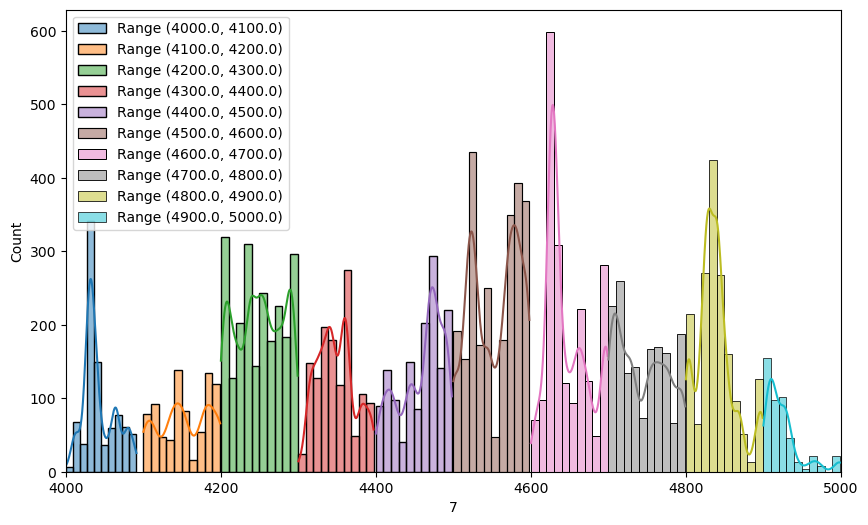

In [68]:
%%time
def histogram(arr,col:int,minvalue,maxvalue,rangescount):
    step=(maxvalue-minvalue) / rangescount
    ranges_list=[]
    i=0
    for i in range(rangescount):
        start=round((minvalue + i*step),3)
        end=round((minvalue + (i+1)*step),3)
        ranges_list.append((start,end))
    hist_data = [[] for _ in range(len(ranges_list))]

    for j in range (arr.shape[0]):
        for i, (start, end) in enumerate(ranges_list):
            if start <= arr[j,col] < end:
                hist_data[i].append(arr[j,col])
                break
    
    plt.figure(figsize=(10, 6))
    for i, data in enumerate(hist_data):
        sns.histplot(data, bins=rangescount, kde=True, label=f'Range {ranges_list[i]}')
    plt.legend()
    plt.xlim(minvalue, maxvalue)
    plt.xlabel(col)
histogram(data2np,7,4000,5000,10)

### 4. Збудувати графік залежності одного integer/real атрибута від іншого.

CPU times: total: 4.41 s
Wall time: 794 ms


<Axes: >

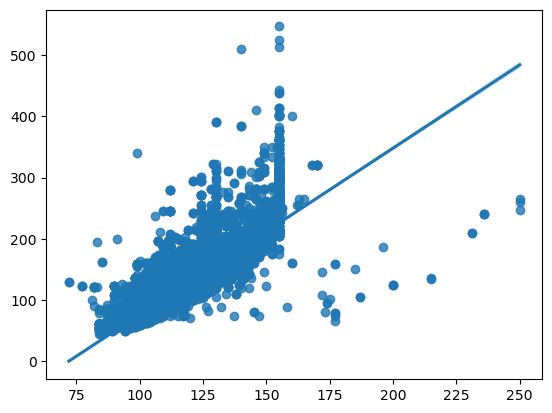

In [32]:
%%time
sns.regplot(x=data2np[:,8].astype(np.float64),y=data2np[:,10].astype(np.float64))

### 5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.

In [69]:
%%time
pearson=scipy.stats.pearsonr(data2np[:,8],data2np[:,10])[0]
print(f"{pearson=}")
spearmanr=scipy.stats.spearmanr(data2np[:,8],data2np[:,10])[0]
print(f"{spearmanr=}")
spearmanr2=scipy.stats.spearmanr(data2np[:,4],data2np[:,10])[0]
print(f"{spearmanr2=}")

pearson=0.8358810966525736
spearmanr=0.8687141149144388
spearmanr2=-0.10075384968399748
CPU times: total: 2.14 s
Wall time: 354 ms


### 6. Провести One Hot Encoding категоріального string атрибуту.

In [34]:
%%time
ohe_arr= data2np.copy()
ard=ohe_arr[:,6].reshape(-1,1)
enc=OneHotEncoder()

enc_data=enc.fit_transform(ard)
# print(enc_data[:50])
enc_arr=enc_data.toarray()

ohe_arr = np.insert(ohe_arr, [7,7], enc_arr, axis=1)
print(ohe_arr[:60])
# print(ohe_arr[1][8])



[['REXTON RX270 SE CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 1.0 0.0 4720.0 111.0 30.1 162.3 81.2 'Automatic' 300.27]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 1.0 0.0 4720.0 111.0 30.1 162.3 75.0 'Manual' 384.105]
 ['REXTON RX270 SX CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 1.0 0.0 4720.0 111.0 28.5 162.3 146.3 'Automatic'
  280.9366666666667]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 1.0 0.0 4720.0 111.0 32.8 162.3 75.0 'Manual' 0]
 ['REXTON RX270 S CRD (163) ESTATE' 2004 2007.0 'SSANGYONG' 5.0 2696.0
  'Diesel' 1.0 0.0 4720.0 111.0 30.1 162.3 75.0 'Automatic'
  285.7133333333333]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  1.0 0.0 5125.0 111.0 28.5 162.3 73.5 'Automatic' 445.605]
 ['RODIUS 270 S CDI ESTATE' 2005 2008.0 'SSANGYONG' 5.0 2696.0 'Diesel'
  1.0 0.0 5125.0 105.0 32.1 162.3 74.4 'Manual' 394.76666666666665]
 ['RODIUS 270

### 7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі -https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

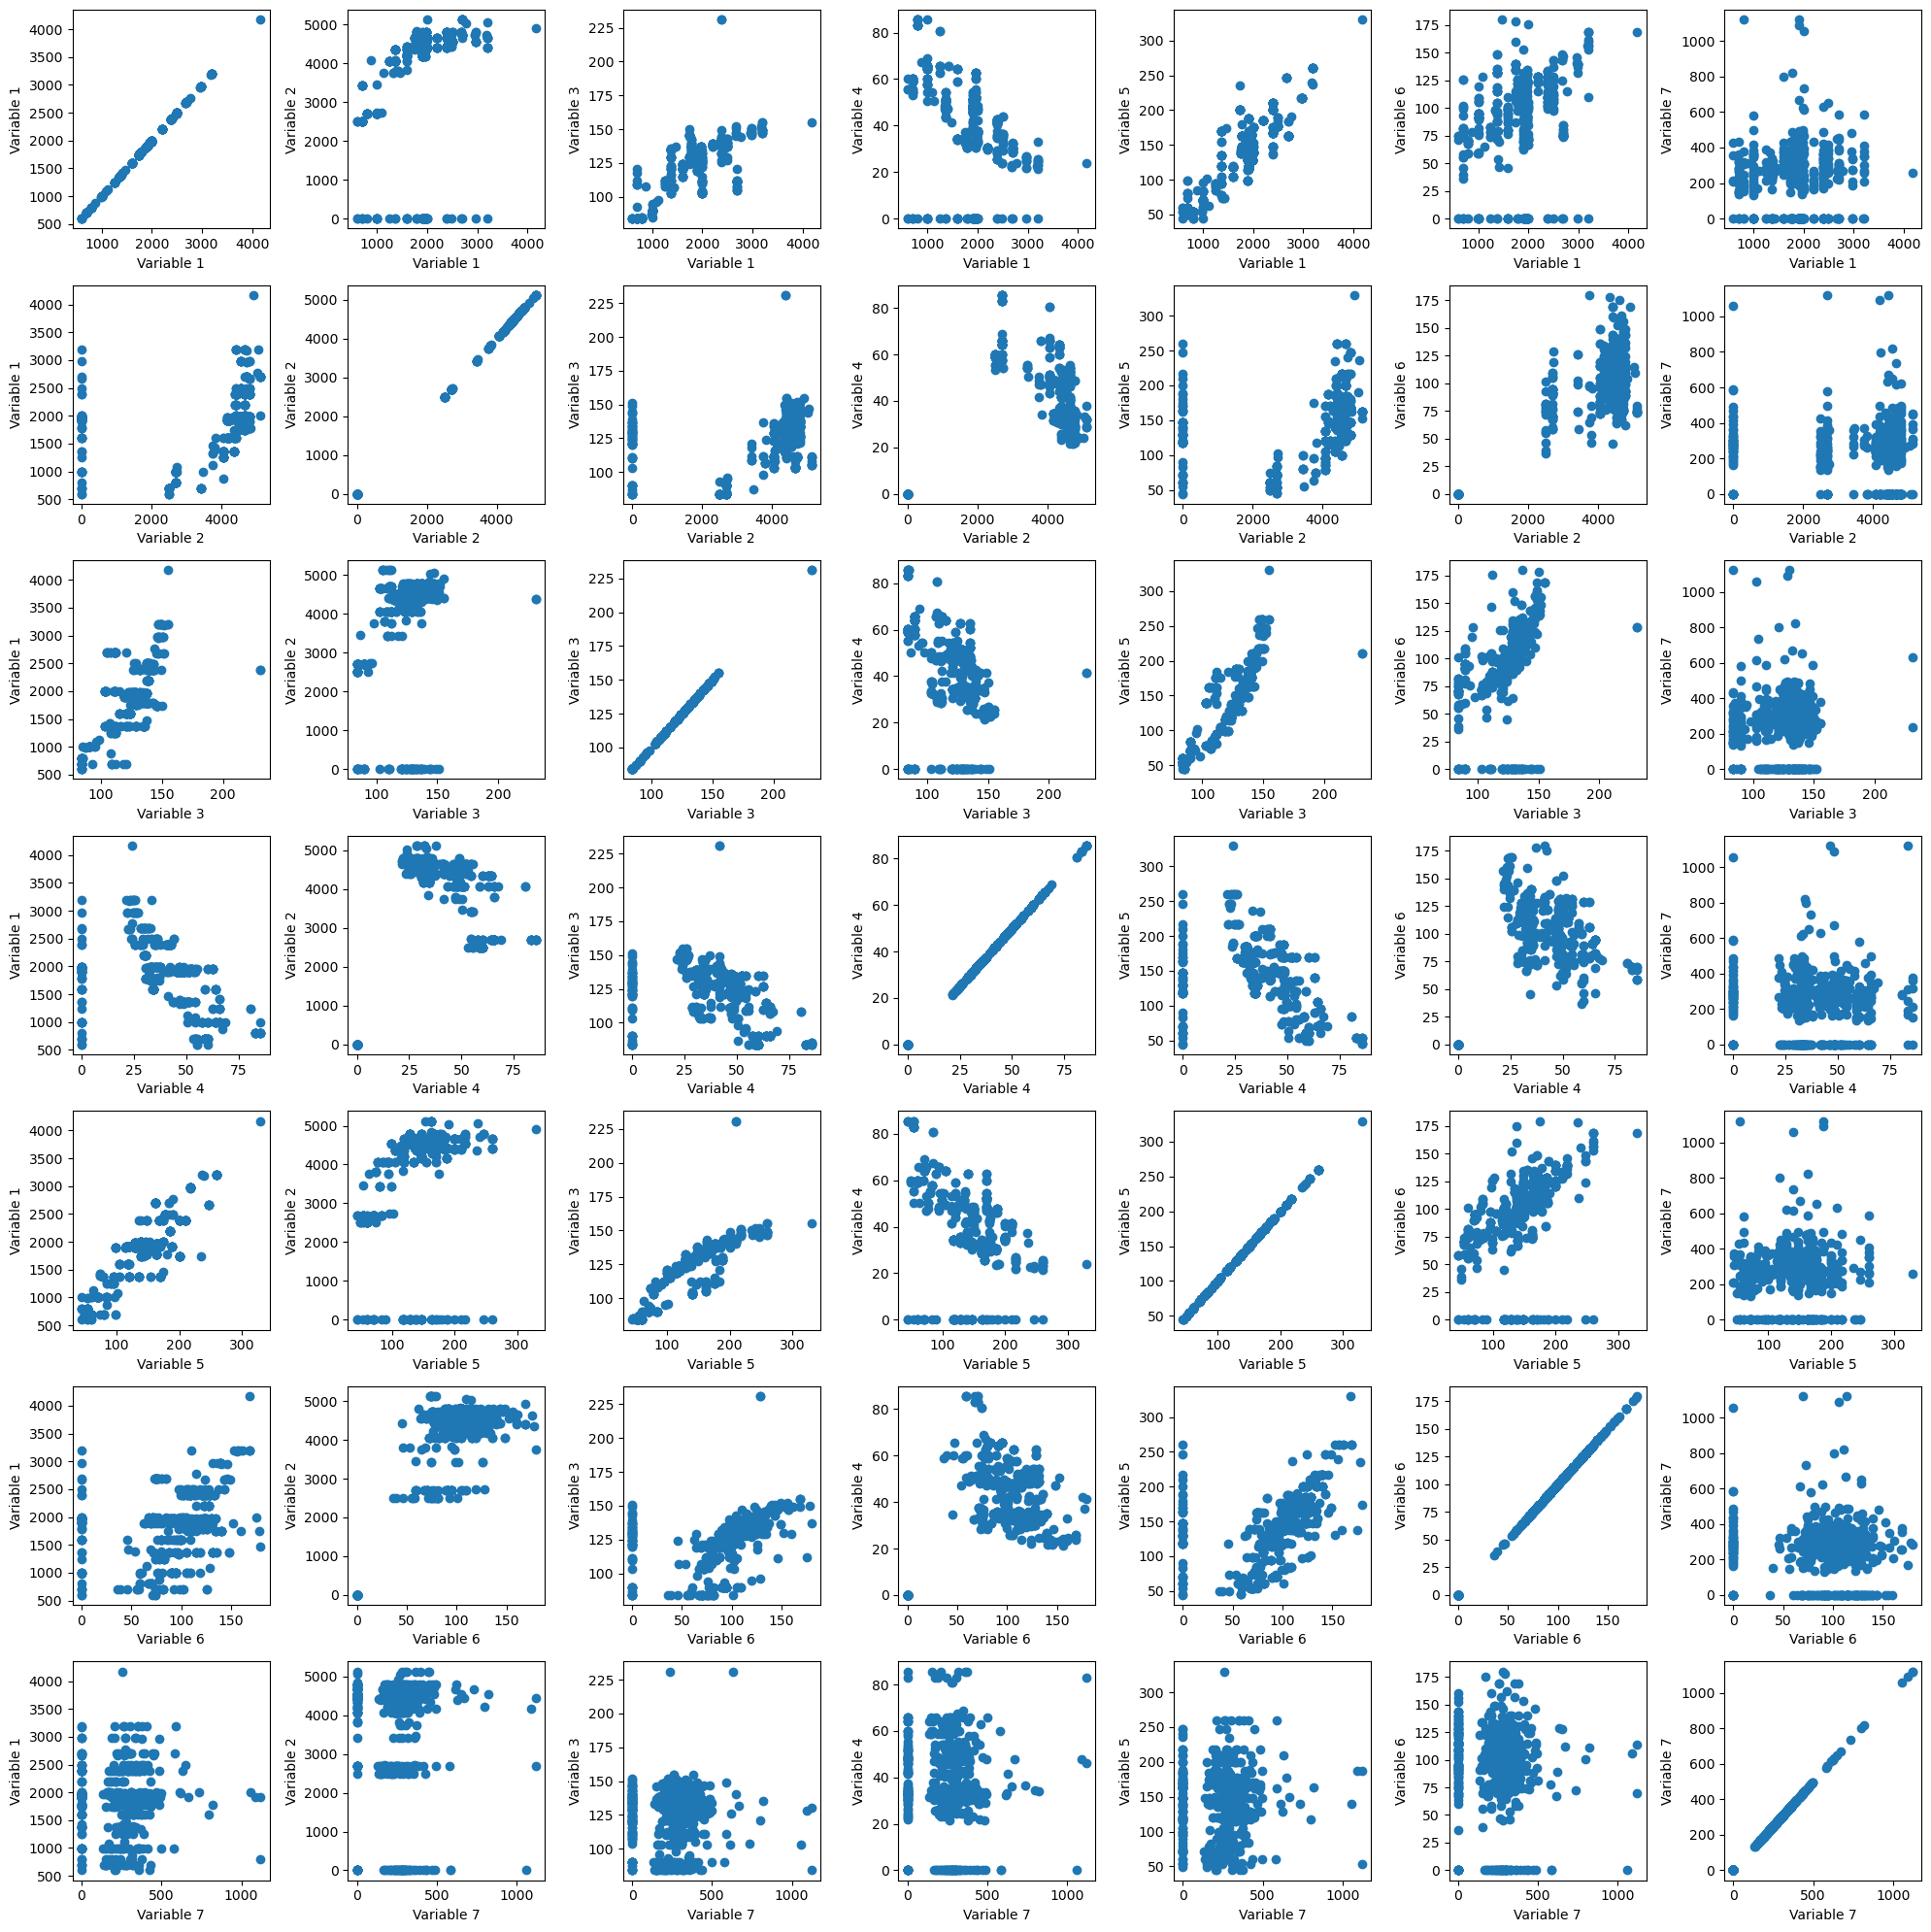

CPU times: total: 5.17 s
Wall time: 4.3 s


In [35]:
%%time
cols= [5, 7, 8, 9, 10, 11, 13]
selected_data = data2np[:, cols]
num_vars = selected_data.shape[1]
fig, axes = plt.subplots(nrows=num_vars, ncols=num_vars, figsize=(20, 20))

for i in range(num_vars):
    for j in range(num_vars):
        axes[i, j].scatter(selected_data[:, i][:500], selected_data[:, j][:500])
        axes[i, j].set_xlabel(f'Variable {i+1}')
        axes[i, j].set_ylabel(f'Variable {j+1}')

plt.tight_layout()
plt.show()

## Таблиця


<table>
    <tr>
        <td rowspan=2>Номер завдання:</td>
        <td>DataFrame</td>
        <td>Numpy array</td>
    </tr>
    <tr>
        <td colspan=2>Швидкість,ms</td>
    </tr>
    <tr>
        <td>1</td>
        <td>9+6.7+8</td>
        <td>12</td>
    </tr>
    <tr>
        <td>2</td>
        <td>340+325</td>
        <td>21+22</td>
    </tr>
    <tr>
        <td>3</td>
        <td>333</td>
        <td>393</td>
    </tr>
    <tr>
        <td>4</td>
        <td>246</td>
        <td>727</td>
    </tr>
    <tr>
        <td>5</td>
        <td>8</td>
        <td>372</td>
    </tr>
    <tr>
        <td>6</td>
        <td>8</td>
        <td>21</td>
    </tr>
    <tr>
        <td>7</td>
        <td>4.12s</td>
        <td>4.42s</td>
    </tr>

</table>